# Week 3 - Machine Learning Essentials

This is an introduction to the basics of machine learning. In the first part of this notebook we want to predict the house prices in Boston with a 13 features . The data was collected in 1978 and each of the 506 entries represents aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

**What is the difference between this task and the one from last week?**

Last week we were interested in estimating the effect of changes in one variable on changes in the outcome variable. In this notebook, the main goal is to predict the target variable from a set of features, so the main focus is not on one of the features and its role in the prediction, but on the performance of the whole model and the quality of the predictions.

## Set up and load data

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

**Which model would you use for this prediction task?**

The target variable is continuous, therefore, we will use a regression model.

In [2]:
from sklearn.datasets import load_boston
data = load_boston() # object is a dictionary
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Data Set Characteristics:

In [3]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
n_samples

506

In [5]:
X_df=pd.DataFrame(X_full, columns=data['feature_names'])
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


No null values in the dataset:

In [6]:
X_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## Exploratory Data Analysis

### Quantity to predict= price (`target`) 

Before the regression, let us inspect the features and their distributions. 

In [7]:
y_full.shape

(506,)

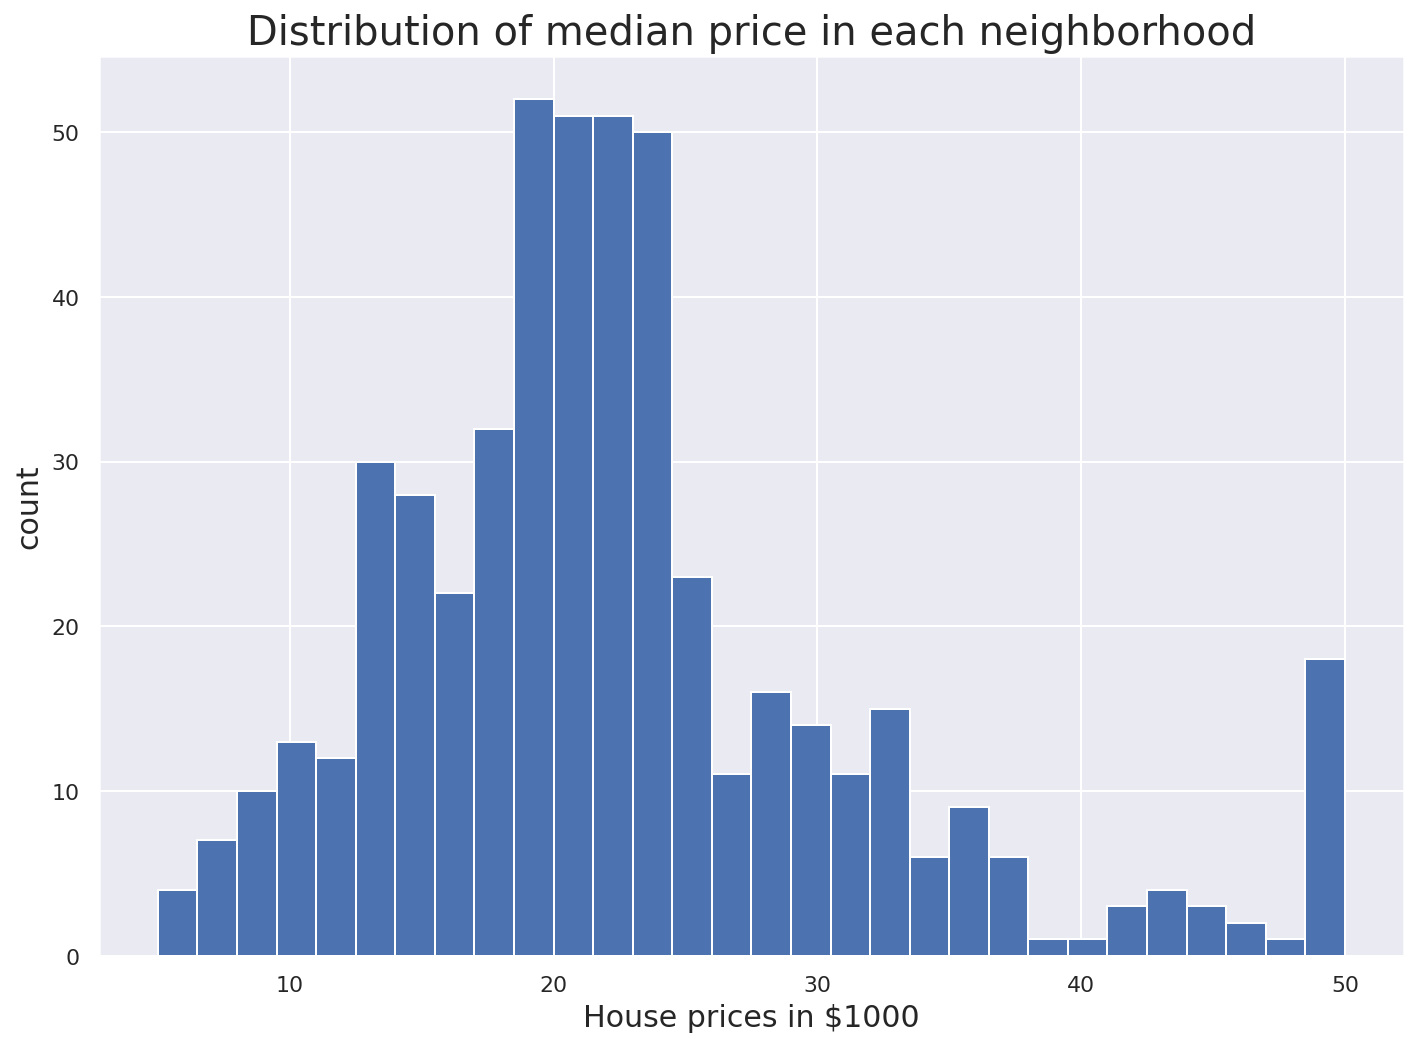

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(y_full, bins=30)
plt.xlabel("House prices in $1000", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of median price in each neighborhood', size=20)
plt.show()

### Features used for prediction

In [9]:
X_full.shape

(506, 13)

#### Distributions
**Histogram plots** to look at the distribution

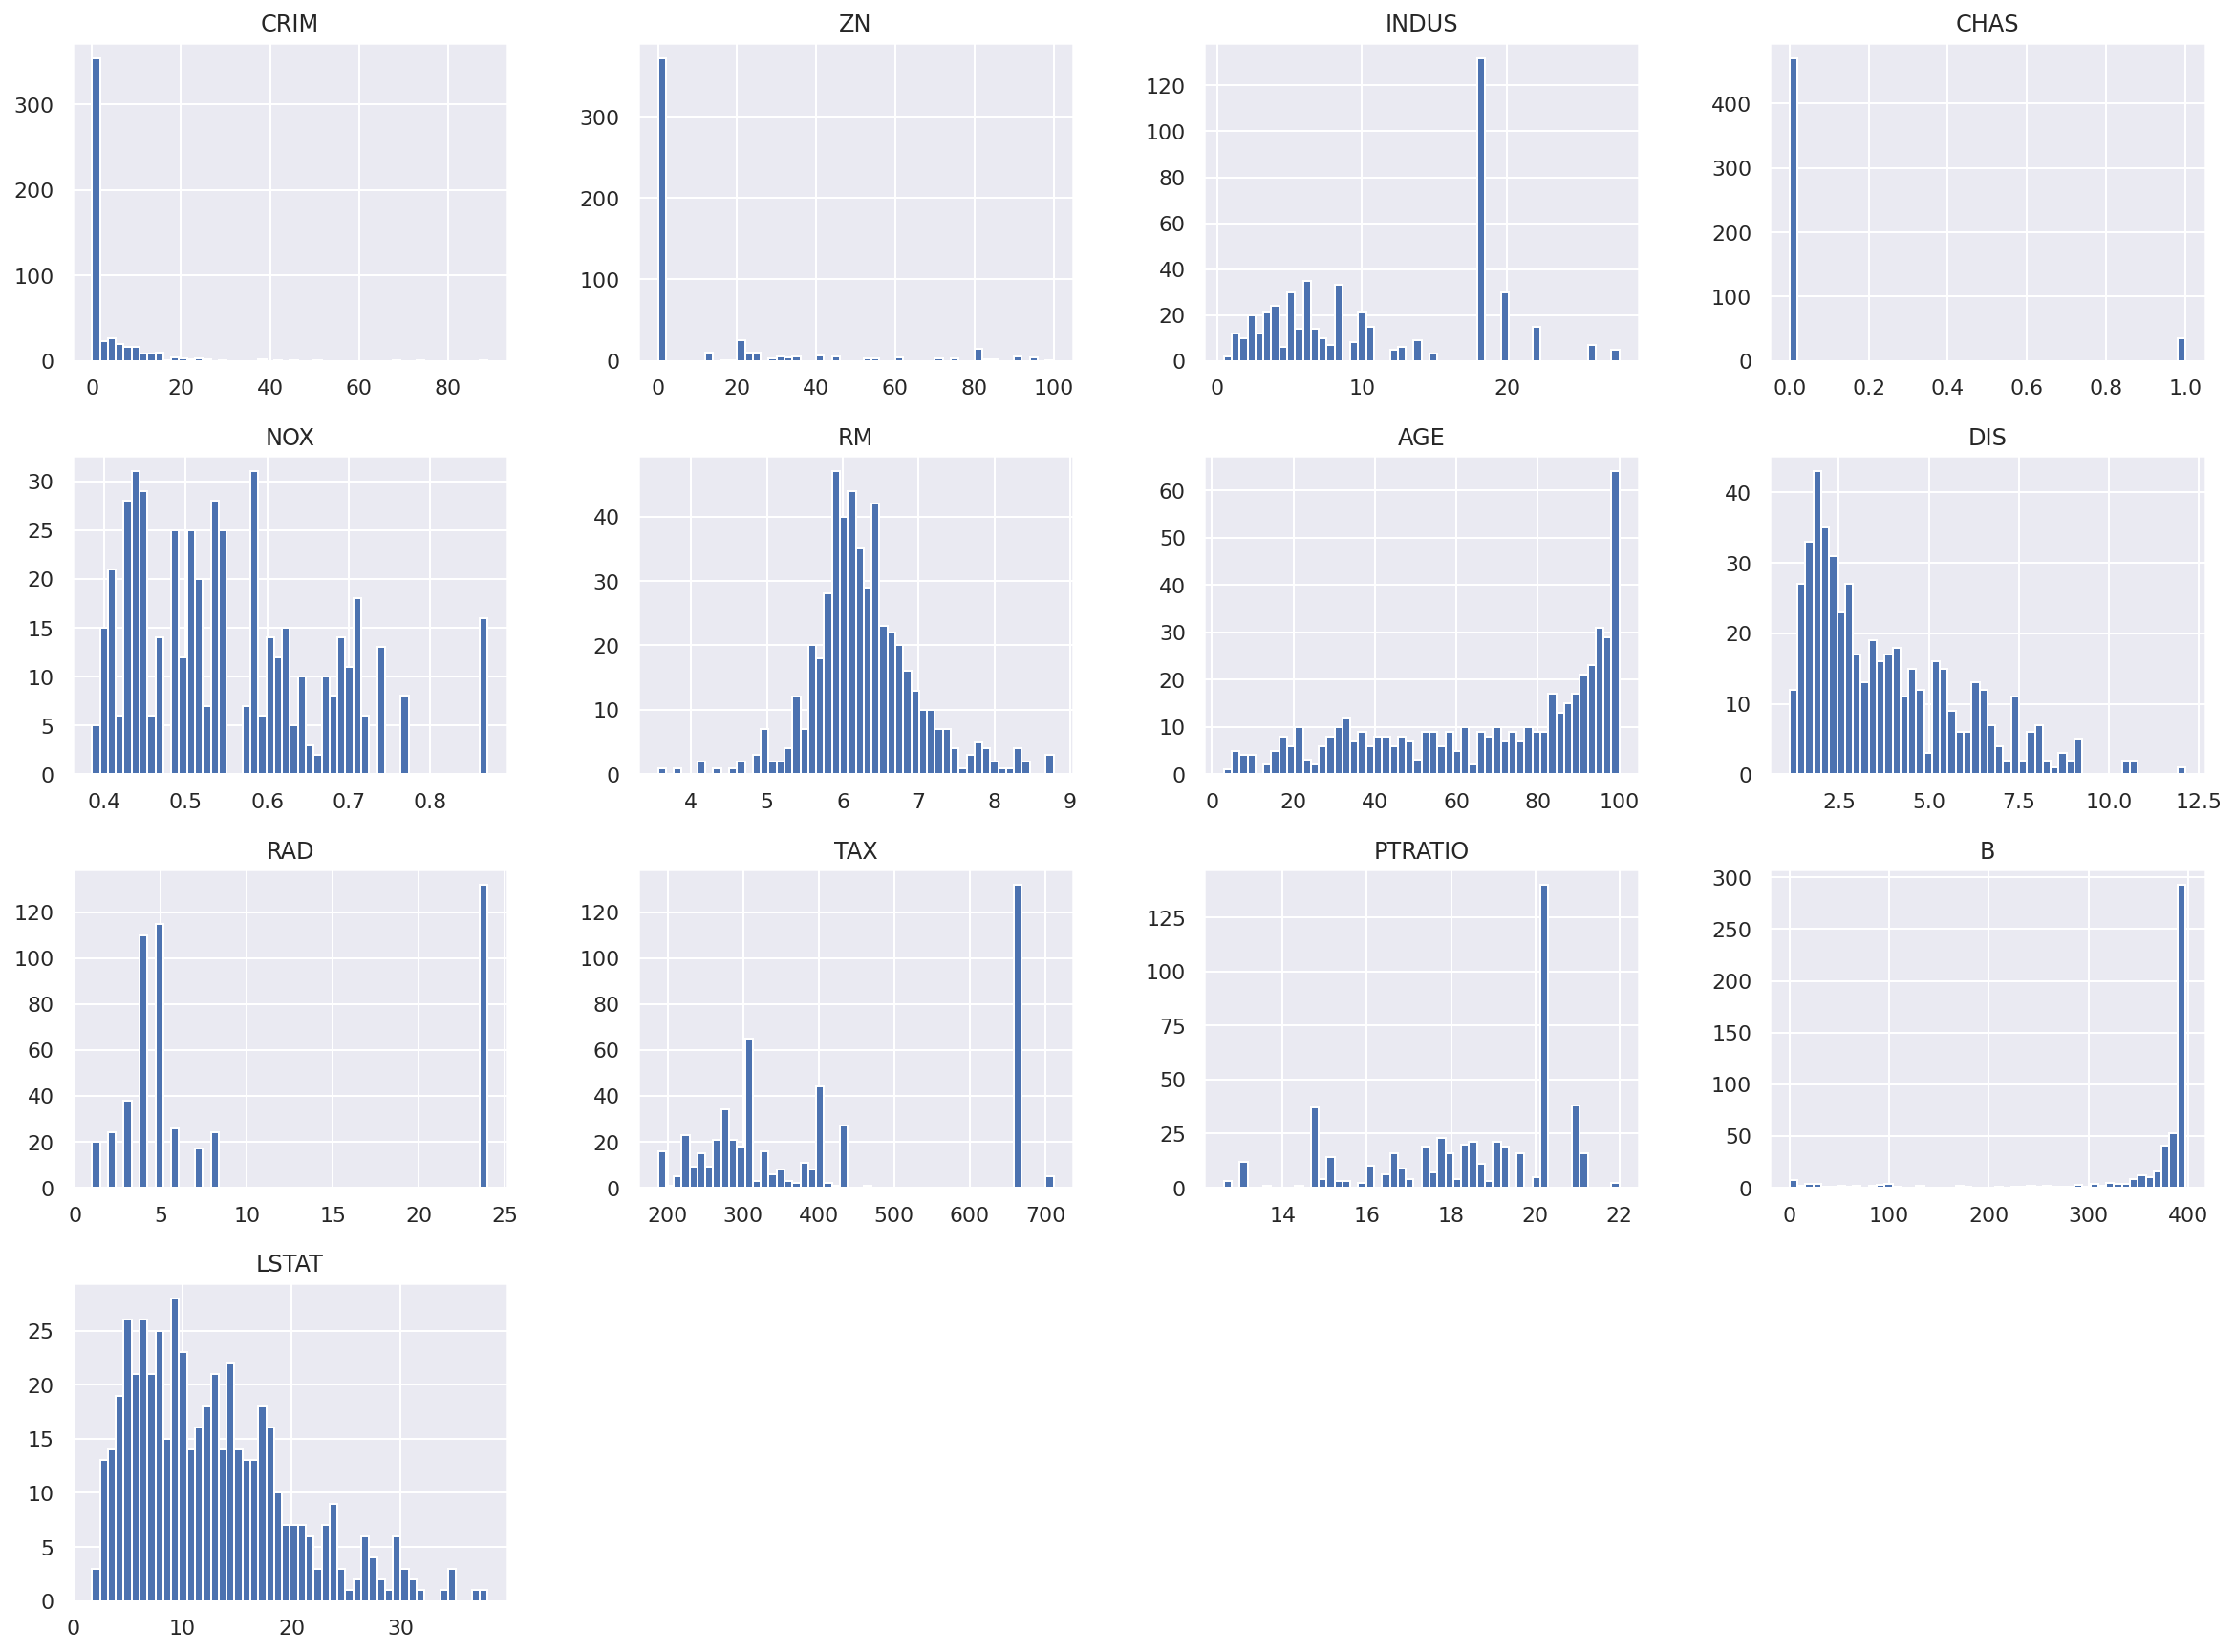

In [10]:
X_df.hist(bins=50, figsize=(20,15))
plt.show()

#### Correlations


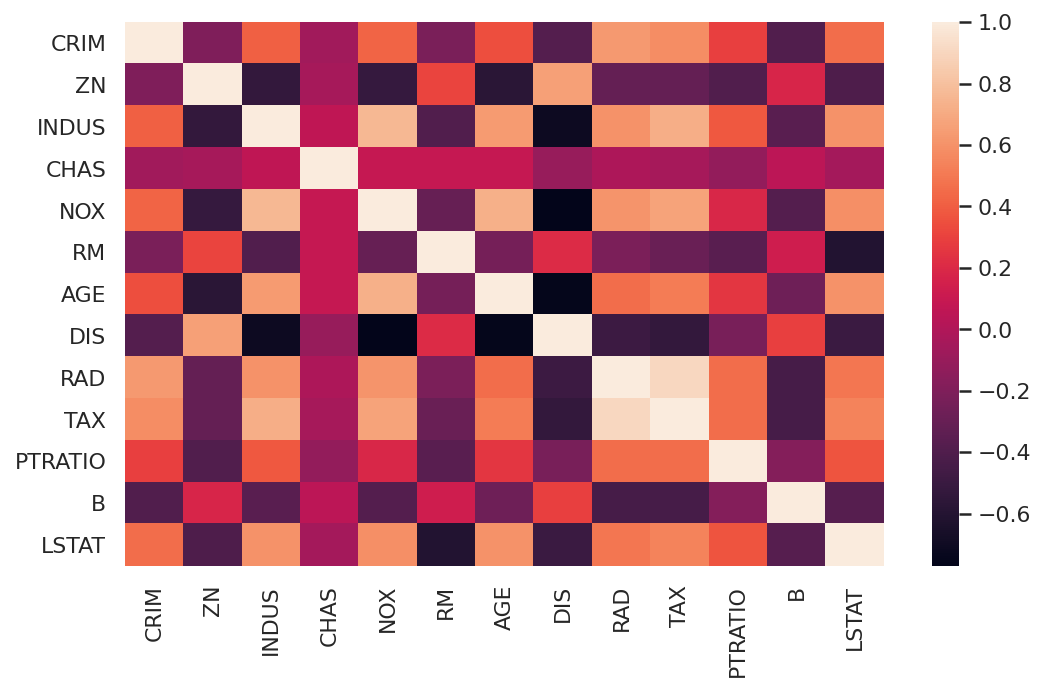

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8.5,5)})
correlation_matrix = X_df.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

An important point in selecting features for a linear regression model is to check for multicolinearity.

**Which variables would you NOT include in the model?**

The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

To investigate this further, we zoom in on the correlations between these variables. What we see is that while the correlation between AGE and DIS is evident, the one between RAD and TAX seems to be driven by a few outliers. Ultimately, both RAD and TAX will be in the model, as well as AGE.

array([[<AxesSubplot:xlabel='DIS', ylabel='DIS'>,
        <AxesSubplot:xlabel='AGE', ylabel='DIS'>,
        <AxesSubplot:xlabel='RAD', ylabel='DIS'>,
        <AxesSubplot:xlabel='TAX', ylabel='DIS'>],
       [<AxesSubplot:xlabel='DIS', ylabel='AGE'>,
        <AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='RAD', ylabel='AGE'>,
        <AxesSubplot:xlabel='TAX', ylabel='AGE'>],
       [<AxesSubplot:xlabel='DIS', ylabel='RAD'>,
        <AxesSubplot:xlabel='AGE', ylabel='RAD'>,
        <AxesSubplot:xlabel='RAD', ylabel='RAD'>,
        <AxesSubplot:xlabel='TAX', ylabel='RAD'>],
       [<AxesSubplot:xlabel='DIS', ylabel='TAX'>,
        <AxesSubplot:xlabel='AGE', ylabel='TAX'>,
        <AxesSubplot:xlabel='RAD', ylabel='TAX'>,
        <AxesSubplot:xlabel='TAX', ylabel='TAX'>]], dtype=object)

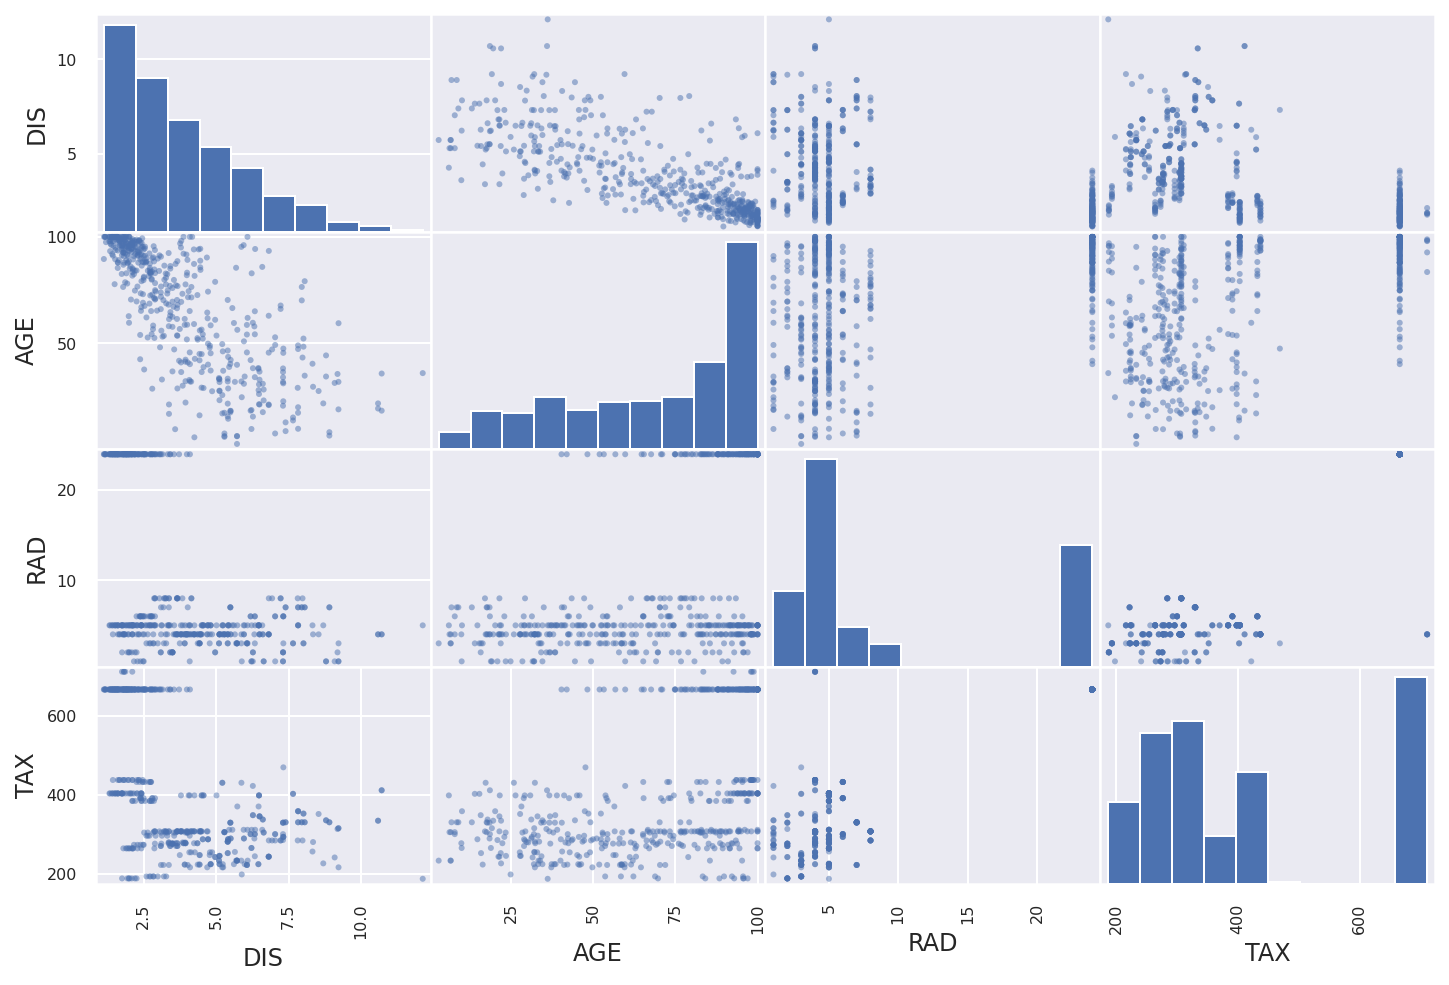

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_df[['DIS', 'AGE','RAD', 'TAX']], figsize=(12, 8))

#### Scatter plot relative to the target (price)

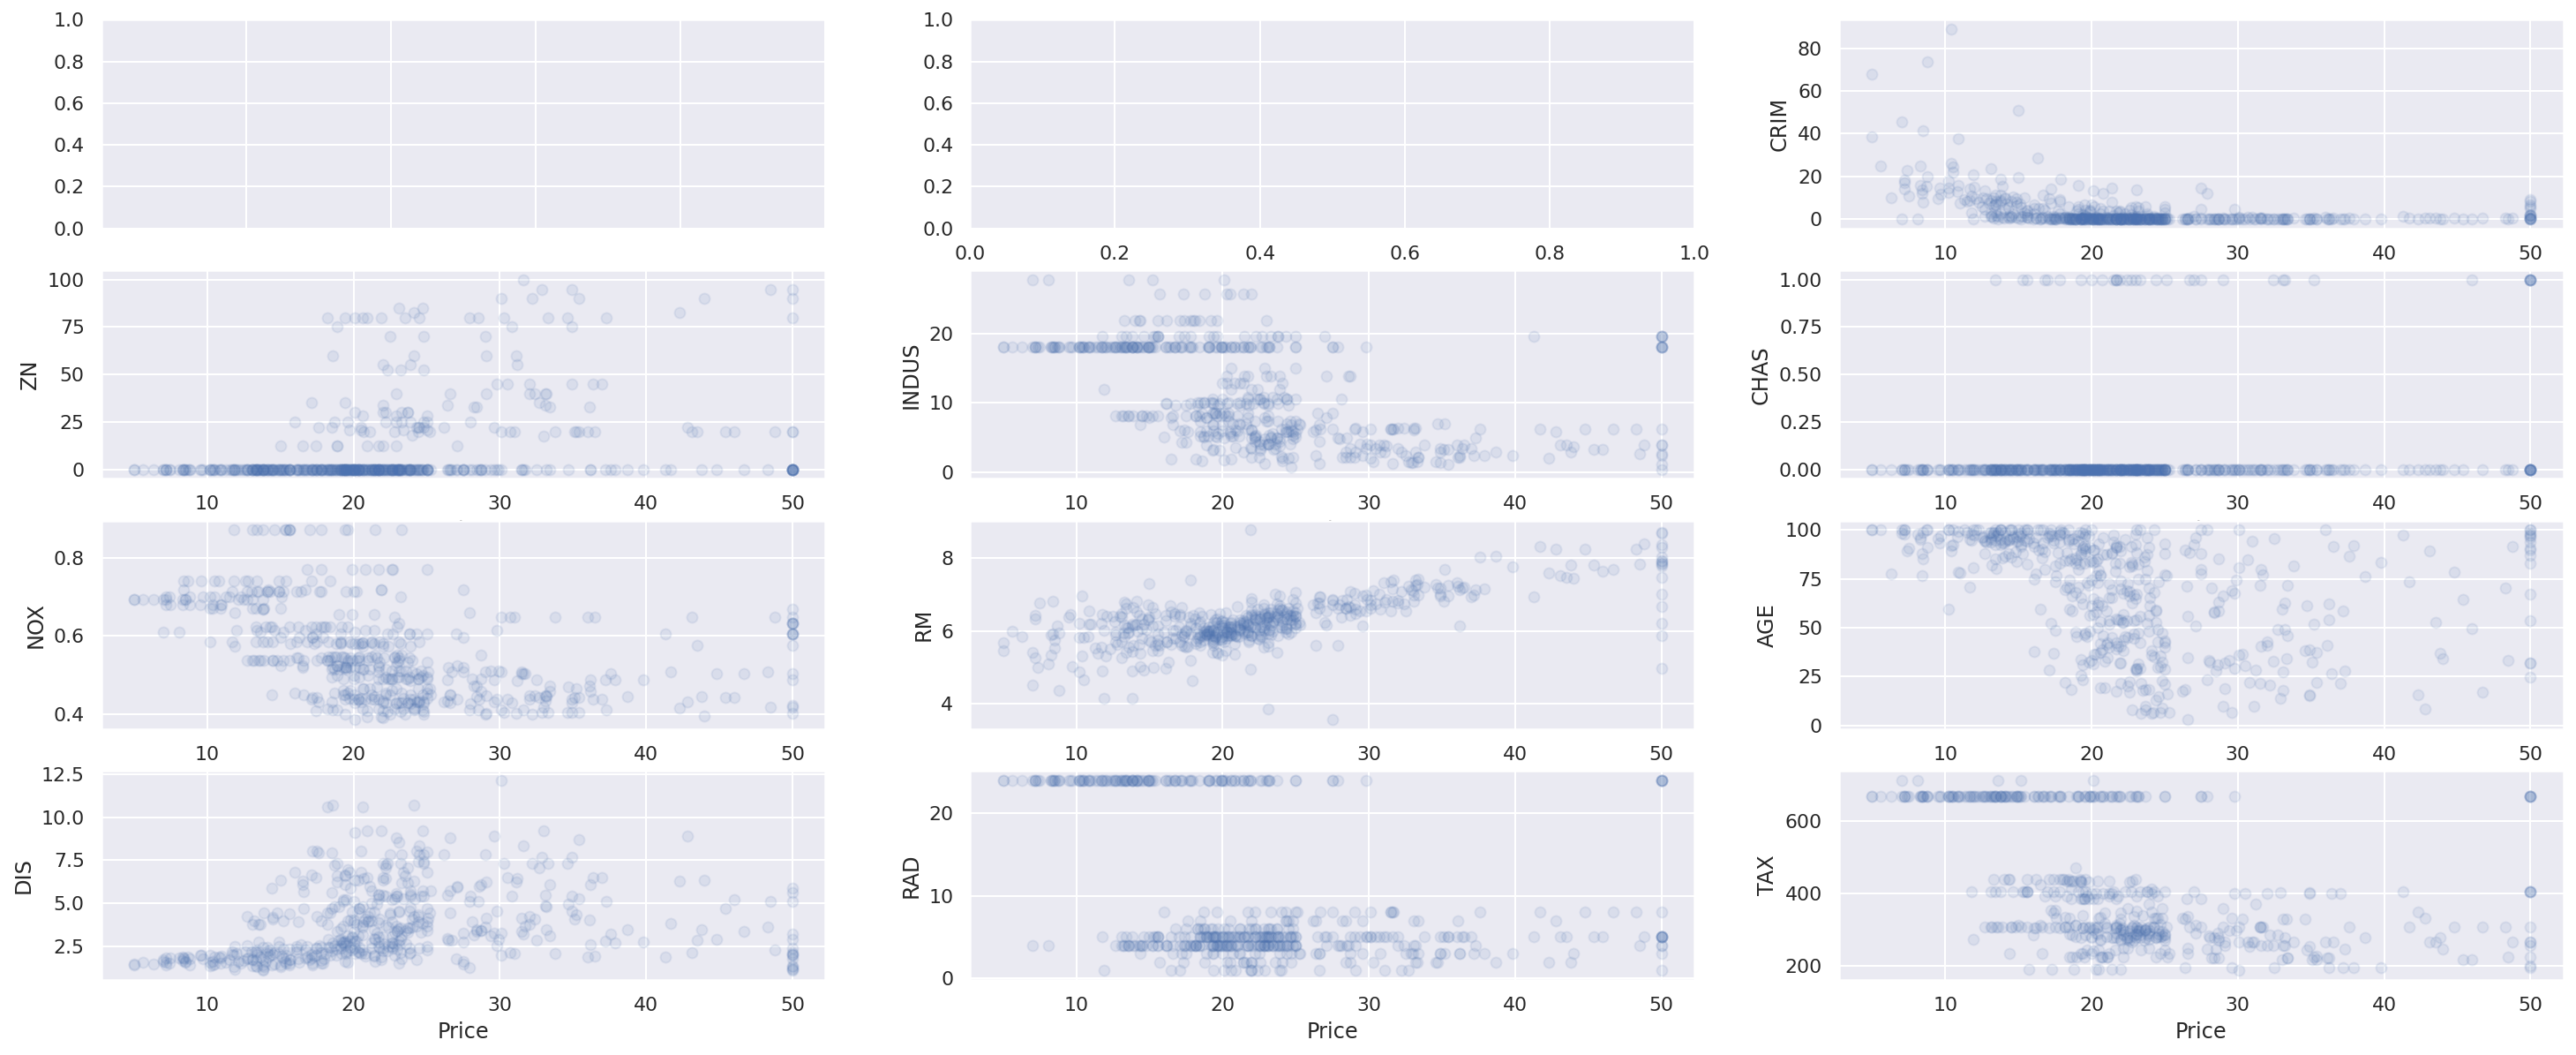

In [13]:
fig, ax = plt.subplots(4, 3, figsize=(25,10))
axe = ax.ravel()
axe[0].set_xticklabels([])
axe[0].set_xlabel(' ')
for i, feature_name in zip(range(1,11), X_df.columns):
    axe[i+1].scatter(y_full, X_df[feature_name], alpha=0.1)
    axe[i+1].set_xlabel('Price')
    axe[i+1].set_ylabel(feature_name)

**What can we say about these correlations?**
 
 - The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line (maybe a linear model is not the riht choice?).

## Prepare the data for ML algorithms

### Drop some labeled observations:

Drop the observations with price >=50 (because of the right censure)

In [14]:
X_full

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [15]:
mask=y_full<50

features_keep =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'RAD', 'PTRATIO', 'B', 'LSTAT']
X_select = X_df[features_keep].to_numpy()

y_full=y_full[mask==True]
X_select=X_select[mask==True]

### Split train test sets 
#### using `train_test_split`
Pure ramdomness of the sampling method

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_select, y_full,test_size=0.2, random_state=1)

In [17]:
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (392, 12) (392,)
test data (98, 12) (98,)


#### Data cleaning
The missing features should be:
1. dropped
2. imputed to some value (zero, the mean, the median...)

**Which option do you think is best?**

In [18]:
from sklearn.preprocessing import OrdinalEncoder # for categorical values

#### Feature Scaling
Most common scaling methods: 
- **standardization**= normalization by substracting the mean and dividing by the standard deviation (values are not bounded)
- **Min-max scaling**= normalization by substracting the minimum and dividing by the maximum (values between `0` and `1`)

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) # can add with_mean=False to not take out mean
X_test_scaled = scaler.transform(X_test)

## Select and Train a Model

### Simple Linear Regression

In [20]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

<div class="alert alert-block alert-warning">
    <i class="fa fa-warning"></i>&nbsp;<strong><code>scikit-learn</code> API</strong>

In <code>scikit-learn</code> all regression algorithms have:
<ul>
    <li>a <strong><code>fit()</code></strong> method to learn from data, and</li>
    <li>and a subsequent <strong><code>predict()</code></strong> method for predicting numbers from input features.</li>
</ul>
</div>

In [21]:
lin_reg.fit(X_train, y_train)
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train, y_train), 2)))

R-squared for training dataset:0.76


In [22]:
lin_reg.fit(X_train_scaled, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

R-squared for training dataset & scaled features:0.76


Coefficients of the linear regression:

In [23]:
features = list(X_df[features_keep].columns)

print('The coefficients of the features from the linear model:')
print(dict(zip(features, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:
{'CRIM': -0.53, 'ZN': 0.03, 'INDUS': 0.01, 'CHAS': 0.2, 'NOX': -0.61, 'RM': 2.48, 'AGE': 0.11, 'TAX': -2.1, 'RAD': 1.98, 'PTRATIO': -1.98, 'B': 0.79, 'LSTAT': -2.79}


### Metrics / error measures   

`scikit-learn` offers the following metrics for measuring regression quality:

#### Mean absolute error

This is the metric we used before. Taking absolute values before adding up the deviatons assures that deviations with different signs can not cancel out.

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>mean absolute error</strong> is defined as 


$$
\frac{1}{n} \left(\, |y_1 - \hat{y}_1| \, + \, |y_2 - \hat{y}_2| \, + \, \ldots \,+ \,|y_n - \hat{y}_n| \,\right)
$$


</div>


The name of the corresponding score in `scikit-learn` is `neg_mean_absolute_error`.


#### Mean squared error

Here we replace the absolute difference by its squared difference. Squaring also insures positive differeces.


<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>mean squared error</strong> is defined as 



$$
\frac{1}{n} \left(\, (y_1 - \hat{y}_1)^2 \, + \, (y_2 - \hat{y}_2)^2 \, \, \ldots \,+ \,(y_n - \hat{y}_n)^2 \,\right)
$$


</div>



This measure is more sensitive to outliers: A few larger differences contribute more significantly to a larger mean squared error. The name of the corresponding score in `scikit-learn` is `neg_mean_squared_error`.


#### Median absolute error

Here we replace mean calculation by median. 

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>median absolute error</strong> is defined as 



$$
\text{median}\left(\,|y_1 - \hat{y}_1|, \,|y_2 - \hat{y}_2|, \,\ldots, \,|y_n - \hat{y}_n| \, \right)
$$


</div>


This measure is less sensitive to outliers than the metrics we discussed before: A few larger differences will not contribute significantly to a larger error value. The name of the corresponding score in `scikit-learn` is `neg_median_absolute_error`.

#### Mean squared log error

The formula for this metric can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-log-error). 

This metric is recommended when your target values are distributed over a huge range of values, like popoluation numbers. 
The previous error metrics would put a larger weight on large target values. One could consider relative deviations to compensate such effects but relative deviations come with other problems like division by zero.


The name is `neg_mean_squared_log_error`

In [24]:
from sklearn.metrics import mean_squared_error

# in-sample performance
y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("RMS: %s" % train_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2)) 

RMS: 722.0714823966941


**What do we need to do to check if the model is performing well?**

We need to assess the performance on the test set, which doesn't look promising. The root mean squared error is very high, hinting that a linear regression model is not well suited for this task.

In [26]:
y_test_pred = lin_reg.predict(X_test)        
test_mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(test_mse)
print("RMS: %s" % rmse) 

RMS: 713.9386414929413


#### $r^2$-score

One other score to mention is the $r^2$-score, for which larger values indicate better regression results.

**What does the R2 indicate?**

The R2 is a measure for how much of the variation in the target can be explained by the variation in the features. The maximum (and best) value that it can take is 1, but it can also take negative values, as the model can be arbitrarly worse .

In [27]:
from sklearn.metrics import r2_score
r2=round(r2_score(y_test, y_test_pred), 2)
print("R2: %s" % r2) 

R2: -9062.74


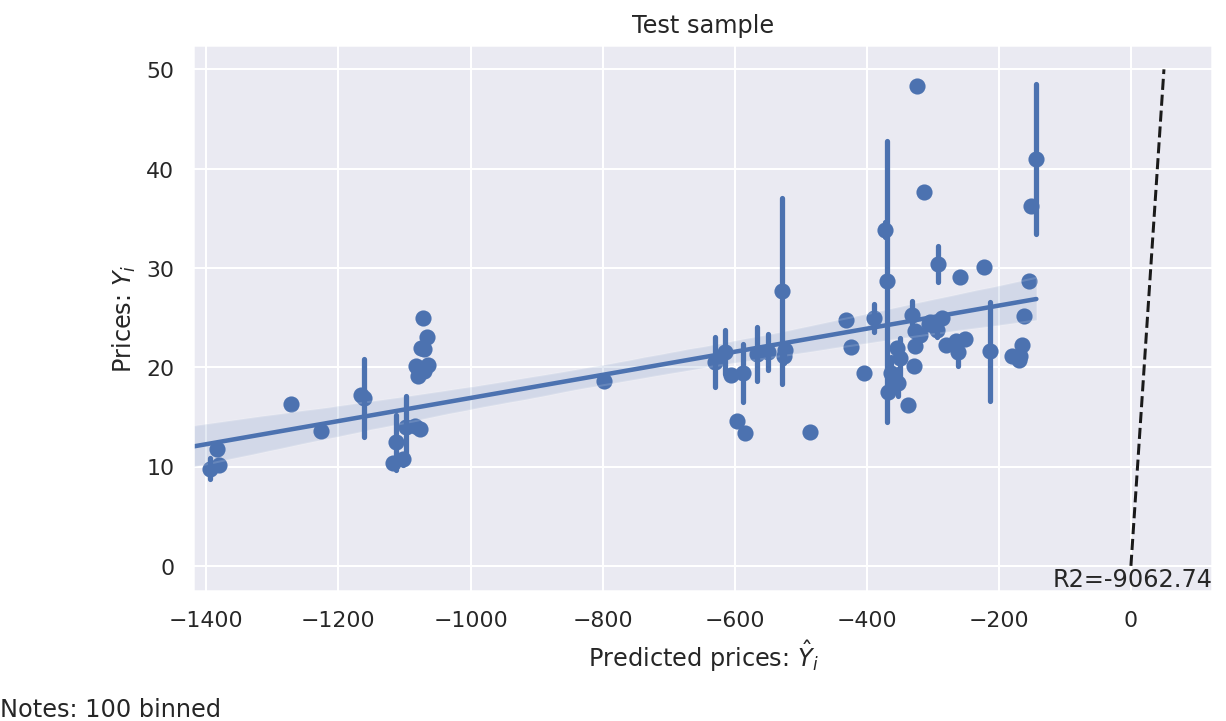

In [28]:
# Regplot
g=sns.regplot(x= y_test_pred, y=y_test, x_bins=100)
g=g.set_title("Test sample")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

**What is the main problem you see here?**

The predicted prices are negative, which is the last hint that the linear reression model is not the correct one for this task. As a last check, we assess if it is the same also in the training set.

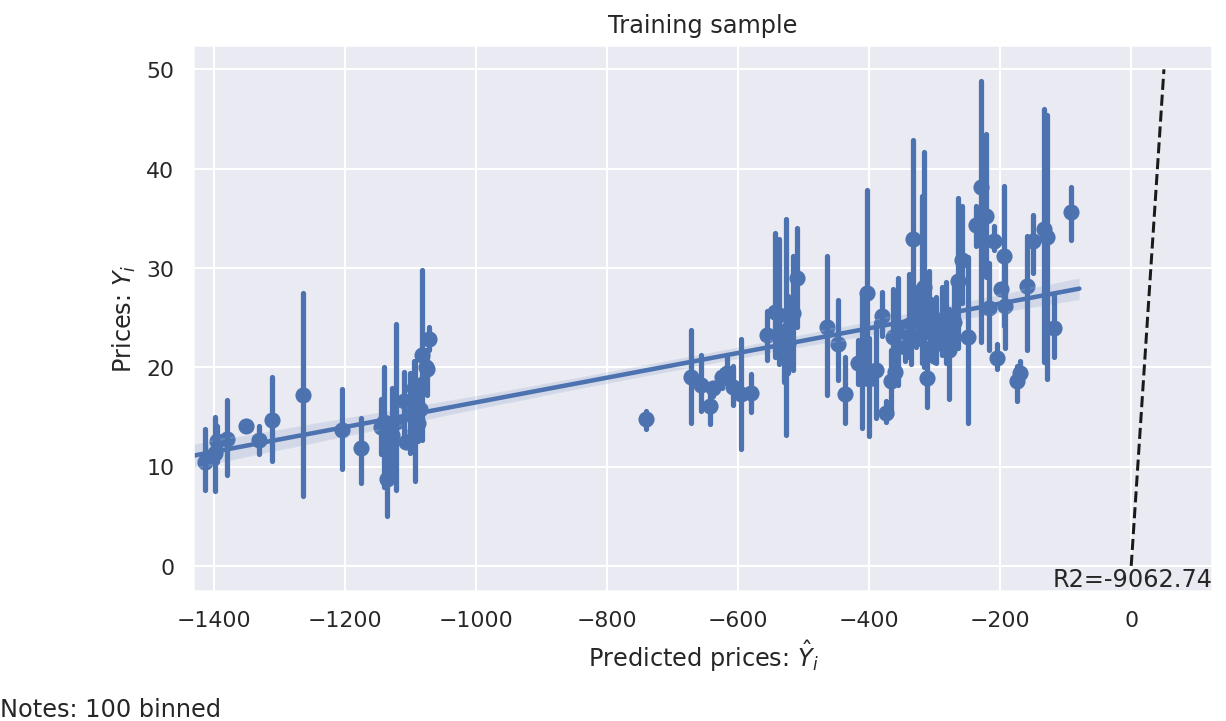

In [29]:
# Regplot
g=sns.regplot(x= y_train_pred, y=y_train, x_bins=100)
g=g.set_title("Training sample")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

### Some algorithms from sklearn

- `sklearn.linear_model.LinearRegression` is a linear regression method, which only works well for target values which can be described as a linear combination of feature values.


- `sklearn.kernel_ridge.KernelRidge` is [documented here](https://scikit-learn.org/stable/modules/kernel_ridge.html#kernel-ridge). It combines the kernel trick from SVMs with classical least squares regression.


- `sklearn.svm.SVR` is an extension of support vector classification concept to regression, [you find examples here](https://scikit-learn.org/stable/modules/svm.html#svm-regression)


- `sklearn.neighbors.KNeighborsRegressor` extends the idea of nearest neighbour classification to regression: Search for similar data points in the learning data set and compute the predicted value from the values from the neighbourhood, e.g. by averaging or by linear interpolation. [Documentation is available here](https://scikit-learn.org/stable/modules/neighbors.html#regression)


- `sklearn.tree.DecisionTreeRegressor` expands the concept of decision trees to regression [is documented here](https://scikit-learn.org/stable/modules/tree.html#regression).




In [30]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=2, solver='cholesky')       
ridge_reg.fit(X_train, y_train)

y_train_pred=ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 3.956788925488908
train R2: 0.75
test R2: 0.72


**How do you think this model performs compared to the linear regression?**

The root mean squared error is much lower and the R2 are close to 1. This means that the Ridge regression performs much better than a linear regression model.

#### Polynomial regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)
X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.fit_transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

y_test_pred = lin_reg.predict(X_test_poly)
test_rmse = mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2))

test RMS: 3.6172972536576005
train R2: 0.75
test R2: 0.77


#### Lasso regression

In [32]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=1)       
lasso_reg.fit(X_train, y_train)

y_test_pred = lasso_reg.predict(X_test)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 4.612599171621641
train R2: 0.75
test R2: 0.62


With scaled X:

In [33]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=1)       
lasso_reg.fit(X_train_scaled, y_train)

y_test_pred = lasso_reg.predict(X_test_scaled)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 4.342233009546379
train R2: 0.75
test R2: 0.66


In [34]:
print('The coefficients of the features from the Lasso model:')
print(dict(zip(features, [round(x, 2) for x in lasso_reg.coef_])))

The coefficients of the features from the Lasso model:
{'CRIM': -0.0, 'ZN': 0.0, 'INDUS': -0.23, 'CHAS': 0.0, 'NOX': -0.0, 'RM': 2.02, 'AGE': -0.0, 'TAX': -0.64, 'RAD': -0.0, 'PTRATIO': -1.17, 'B': 0.06, 'LSTAT': -2.88}


**What can we learn from these coefficients?**

This is a tricky question. The answer is nothing reliable: recalling the graph with the coefficients from different LASSO models trained on the same data you saw in class, the weights given by the model in each iteration are not consistent. Therefore, it can be that at the next iteration the model excludes variables that here were included in the estimation, making these coefficients unreliable.

#### Elastic Net

Elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. Reference [paper](https://web.stanford.edu/~hastie/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf).

In [35]:
from sklearn.linear_model import ElasticNet
elanet_reg=ElasticNet(random_state=0)
elanet_reg.fit(X_train_scaled, y_train)

y_test_pred = elanet_reg.predict(X_test_scaled)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 4.363830350274336
train R2: 0.75
test R2: 0.66


#### Setting the **regularization parameter**: generalized Cross-Validation.

In [36]:
np.logspace(-6, 6, 13)

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [37]:
from sklearn import linear_model
lassocv_reg = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
lassocv_reg.fit(X_train, y_train)
alpha=lassocv_reg.alpha_ 
print("Best alpha", alpha)

Best alpha 0.1


Then re-run the model using the best alpha:

In [38]:
lasso_reg=Lasso(alpha=alpha)       

lasso_reg.fit(X_train_scaled, y_train)

y_train_pred=lasso_reg.predict(X_train_scaled)
y_test_pred = lasso_reg.predict(X_test_scaled)        
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2)) 

test RMS: 4.028598703351033
train R2: 0.75
test R2: 0.71


## Fine-tuning of the Model

### Model Evaluation using Cross-Validation

<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; cross_val_score expect a utility function rather than a cost function: the scoring function is the opposite of the MSE. 
</div>


In [39]:
from sklearn.model_selection import cross_val_score, cross_val_predict
# Perform 6-fold cross validation
scores = cross_val_score(elanet_reg, X_train_scaled, y_train, 
                         scoring="neg_mean_squared_error", cv=5)
scores

array([-14.96392144, -20.02416381, -20.20082888, -22.69195493,
       -19.66655698])

In [40]:
# Make cross validated predictions
y_train_pred_cv = cross_val_predict(elanet_reg, X_train_scaled, y_train, cv=5)

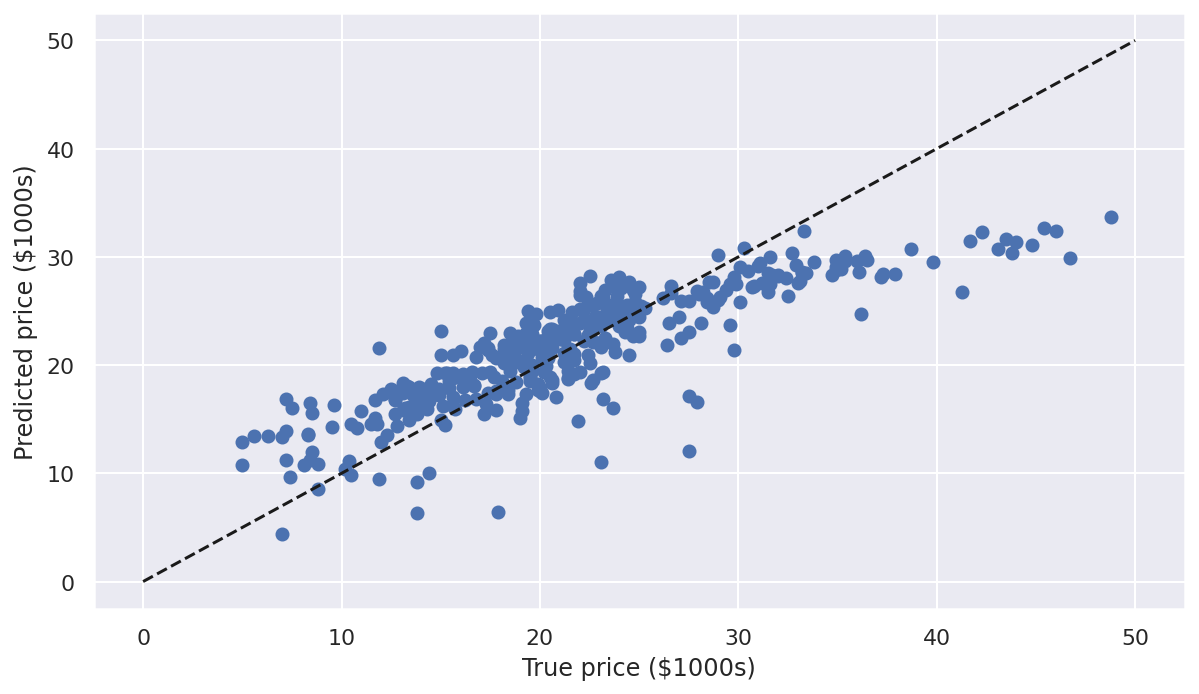

In [41]:
## plt.figure(figsize=(4, 3))
plt.scatter(y_train, y_train_pred_cv)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

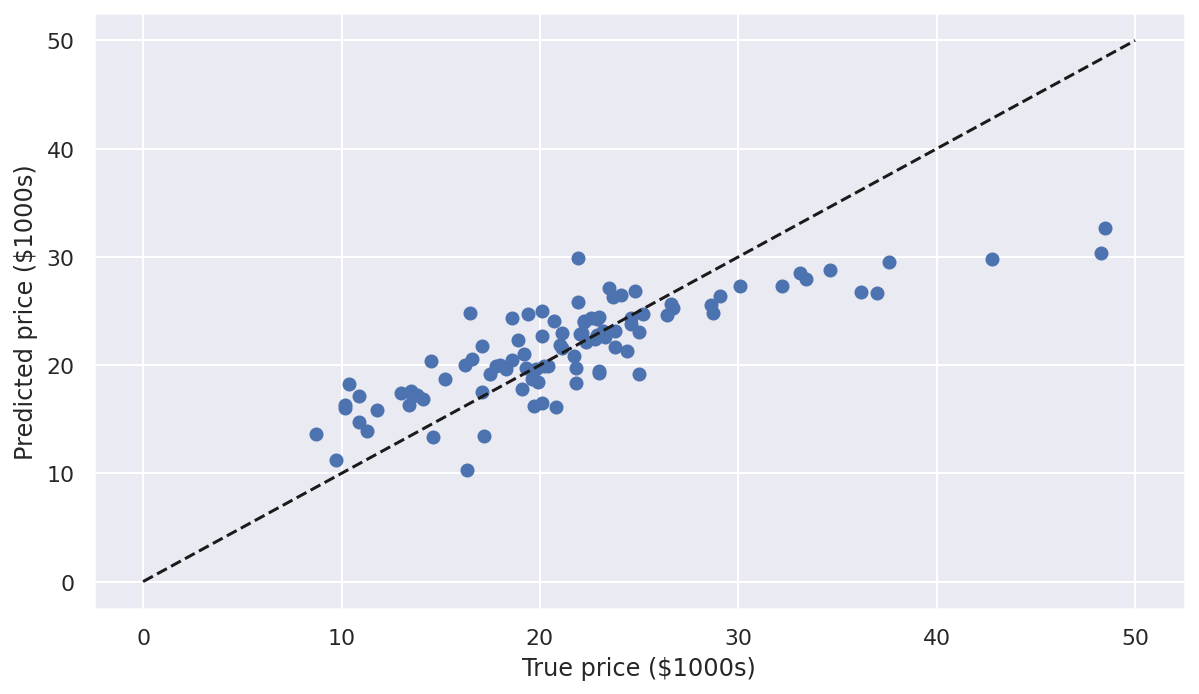

In [42]:
y_test_pred_cv = cross_val_predict(elanet_reg, X_test_scaled, y_test, cv=5)

plt.scatter(y_test, y_test_pred_cv)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

#### Hyperparameters tuning

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'alpha': [0.0001, 0.001, 0.01, 0.1 ,1, 10],
      'l1_ratio':[.1,.5,.9,1]}
 ]
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(elanet_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=0),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'l1_ratio': [0.1, 0.5, 0.9, 1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Score of each hyperparameter combination tested during the grid search:

In [44]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.093843099129899 {'alpha': 0.0001, 'l1_ratio': 0.1}
4.094056589023458 {'alpha': 0.0001, 'l1_ratio': 0.5}
4.094278222156522 {'alpha': 0.0001, 'l1_ratio': 0.9}
4.094334951351225 {'alpha': 0.0001, 'l1_ratio': 1}
4.090933015546853 {'alpha': 0.001, 'l1_ratio': 0.1}
4.0921422153132925 {'alpha': 0.001, 'l1_ratio': 0.5}
4.093808570487103 {'alpha': 0.001, 'l1_ratio': 0.9}
4.094324615165695 {'alpha': 0.001, 'l1_ratio': 1}
4.087718169722989 {'alpha': 0.01, 'l1_ratio': 0.1}
4.089317104773713 {'alpha': 0.01, 'l1_ratio': 0.5}
4.091020287601451 {'alpha': 0.01, 'l1_ratio': 0.9}
4.092190791527857 {'alpha': 0.01, 'l1_ratio': 1}
4.116250338622269 {'alpha': 0.1, 'l1_ratio': 0.1}
4.101933952410265 {'alpha': 0.1, 'l1_ratio': 0.5}
4.08864594642624 {'alpha': 0.1, 'l1_ratio': 0.9}
4.086543414262914 {'alpha': 0.1, 'l1_ratio': 1}
4.365509236392725 {'alpha': 1, 'l1_ratio': 0.1}
4.392991022520718 {'alpha': 1, 'l1_ratio': 0.5}
4.469274553396454 {'alpha': 1, 'l1_ratio': 0.9}
4.518706240351673 {'alpha': 1, 'l1_ratio

**What is the best combination of paramters?**

In [45]:
grid_search.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [46]:
grid_search.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1, random_state=0)

You can vizualize the grid search results:

Text(0, 0.5, 'Avg. mean test score')

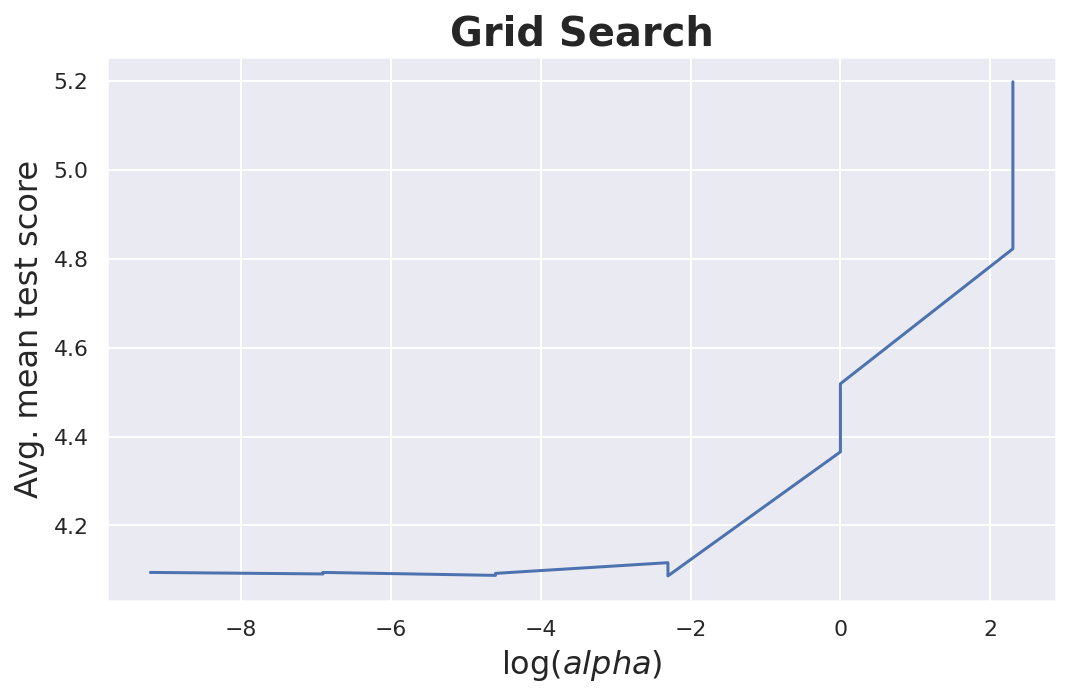

In [47]:
df_cvres=pd.DataFrame(cvres)
df_cvres['mean_test_score_pos_sqrt']=df_cvres['mean_test_score'].apply(lambda x: np.sqrt(-x))
df_cvres['log_param_alpha']=df_cvres['param_alpha'].apply(lambda x: np.log(x))
df_cvres.head()

_, ax = plt.subplots(1,1)
plt.plot(df_cvres["log_param_alpha"], df_cvres["mean_test_score_pos_sqrt"])
ax.set_title("Grid Search", fontsize=20, fontweight='bold')
ax.set_xlabel("$\log (alpha)$", fontsize=16)
ax.set_ylabel('Avg. mean test score', fontsize=16)

Other possibility: for randomized search of hyperparameters. Differently from the grid search algorithm which goes through all the possible combinations of the parameters, the randomized search randomly picks only some combinations of parameters. It is ery useful if have many parameters to choose from and/or many values to pick from. 

In [48]:
from sklearn.model_selection import RandomizedSearchCV

rand_search = RandomizedSearchCV(elanet_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(random_state=0),
                   param_distributions=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10],
                                         'l1_ratio': [0.1, 0.5, 0.9, 1]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
rand_search.best_params_

{'l1_ratio': 1, 'alpha': 0.1}

In [50]:
rand_search.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1, random_state=0)